# Organizacion de Datos - Trabajo Practico N°1

## 1. Analisis Exploratorio y Preprocesamiento de Datos

#### Drive

Primero, cargamos el archivo csv en forma de dataframe para poder empezar a trabajar con los datos.

In [286]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Lectura de CSV

In [287]:
import pandas as pd

properati = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/properati_argentina_2021.csv')
print(properati.shape)
properati.head()

(460154, 20)


,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


In [288]:
properati.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6', 'operation',
       'property_type', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'property_price',
       'property_currency', 'property_title'],
      dtype='object')

#### Filtrado Inicial

Ahora, como solo nos interesan propiedades con ciertos criterios filtramos tipo de vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

In [289]:
# Filtrar por tipo de propiedad (Casa, PH y Departamento) y ubicación en Capital Federal
properati_filtrado = properati[(properati['property_type'].isin(['Casa', 'PH', 'Departamento'])) & (properati['place_l2'] == 'Capital Federal')]

# Filtrar por tipo de operación sea venta y precio en dólares (USD)
properati_filtrado = properati_filtrado[(properati_filtrado['operation'] == 'Venta') & (properati_filtrado['property_currency'] == 'USD')]

properati_filtrado.to_csv("properati_filtrado.csv")

print(properati_filtrado.shape)
properati_filtrado.head()

(94249, 20)


,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


#### Train

Se separa el conjunto entre uno de entrenamiento (80%) y otro de test (20%).

In [290]:
from sklearn.model_selection import train_test_split

train_properati, test_properati = train_test_split(properati_filtrado, test_size=0.2, random_state=42)

#### a) Exploración Inicial : analizar cada variable, considerando los siguientes aspectos


*   Variables Cuantitativas: calcular medidas de resumen: media, mediana,moda,etc
*   Variables Cualitativas: mostrar cantidad de valores posibles, y frecuencias de cada uno.
*   Determinar variables irrelevantes en el análisis
*   Realizar un análisis gráfico de las distribuciones de las variables más relevantes
*   Analizar las correlaciones existentes entre las variables.

##### **Varaibles Cuantitativas**

###### **Latitud**

In [291]:
# el id no me parece que haya que analizarlo, ya que es unico para cada propiedad
#start_date, end_date, created_on )?

#latitud
media_lat = properati_filtrado['latitud'].mean()
mediana_lat = properati_filtrado['latitud'].median()
moda_lat = properati_filtrado['latitud'].mode()
cuartiles_lat = properati_filtrado['latitud'].quantile([0.25, 0.5, 0.75])

Q1_lat = cuartiles_lat[0.25]
Q3_lat = cuartiles_lat[0.75]
IQR_lat = Q3_lat - Q1_lat

print(media_lat)
print(mediana_lat)
print(moda_lat)
print(Q1_lat)
print(cuartiles_lat[0.5])
print(Q3_lat)
print(IQR_lat)

-34.59148102467374
-34.5957896
0   -34.54125
Name: latitud, dtype: float64
-34.6159754
-34.5957896
-34.5774132
0.03856220000000121


###### **Longitud**

In [292]:
#longitud
media_long = properati_filtrado['longitud'].mean()
mediana_long = properati_filtrado['longitud'].median()
moda_long = properati_filtrado['longitud'].mode()
cuartiles_long = properati_filtrado['longitud'].quantile([0.25, 0.5, 0.75])

Q1_long = cuartiles_long[0.25]
Q3_long = cuartiles_long[0.75]
IQR_long = Q3_long - Q1_long

print(media_long)
print(mediana_long)
print(moda_long)
print(Q1_long)
print(cuartiles_long[0.5])
print(Q3_long)
print(IQR_long)

-58.449794544855415
-58.4390004
0   -58.472966
Name: longitud, dtype: float64
-58.4665217
-58.4390004
-58.4088623
0.057659399999998584


###### **Rooms**

In [293]:
#'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6', 'operation','property_type'---> no son numeros
#property_rooms
media_rooms = properati_filtrado['property_rooms'].mean()
mediana_rooms = properati_filtrado['property_rooms'].median()
moda_rooms = properati_filtrado['property_rooms'].mode()
cuartiles_rooms = properati_filtrado['property_rooms'].quantile([0.25, 0.5, 0.75])

Q1_rooms = cuartiles_rooms[0.25]
Q3_rooms = cuartiles_rooms[0.75]
IQR_rooms = Q3_rooms - Q1_rooms

print(media_rooms)
print(mediana_rooms)
print(moda_rooms)
print(Q1_rooms)
print(cuartiles_rooms[0.5])
print(Q3_rooms)
print(IQR_rooms)

2.8227992060511777
3.0
0    3.0
Name: property_rooms, dtype: float64
2.0
3.0
4.0
2.0


###### **Bedrooms**

In [294]:
#propery_bedrooms
media_bedrooms = properati_filtrado['property_bedrooms'].mean()
mediana_bedrooms = properati_filtrado['property_bedrooms'].median()
moda_bedrooms = properati_filtrado['property_bedrooms'].mode()
cuartiles_bedrooms = properati_filtrado['property_bedrooms'].quantile([0.25, 0.5, 0.75])

Q1_bedrooms = cuartiles_bedrooms[0.25]
Q3_bedrooms = cuartiles_bedrooms[0.75]
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

print(media_bedrooms)
print(mediana_bedrooms)
print(moda_bedrooms)
print(Q1_bedrooms)
print(cuartiles_bedrooms[0.5])
print(Q3_bedrooms)
print(IQR_bedrooms)

2.0146285220148448
2.0
0    1.0
Name: property_bedrooms, dtype: float64
1.0
2.0
3.0
2.0


###### **Propery Surface Total**

In [295]:
#property_surface_total
media_surface_total = properati_filtrado['property_surface_total'].mean()
mediana_surface_total = properati_filtrado['property_surface_total'].median()
moda_surface_total = properati_filtrado['property_surface_total'].mode()
cuartiles_surface_total = properati_filtrado['property_surface_total'].quantile([0.25, 0.5, 0.75])

Q1_surface_total = cuartiles_surface_total[0.25]
Q3_surface_total = cuartiles_surface_total[0.75]
IQR_surface_total = Q3_surface_total - Q1_surface_total

print(media_surface_total)
print(mediana_surface_total)
print(moda_surface_total)
print(Q1_surface_total)
print(cuartiles_surface_total[0.5])
print(Q3_surface_total)
print(IQR_surface_total)

109.09297019182372
65.0
0    50.0
Name: property_surface_total, dtype: float64
45.0
65.0
105.0
60.0


###### **Surface Covered**

In [296]:
#property_surface_covered
media_surface_covered = properati_filtrado['property_surface_covered'].mean()
mediana_surface_covered = properati_filtrado['property_surface_covered'].median()
moda_surface_covered = properati_filtrado['property_surface_covered'].mode()
cuartiles_surface_covered = properati_filtrado['property_surface_covered'].quantile([0.25, 0.5, 0.75])

Q1_surface_covered = cuartiles_surface_covered[0.25]
Q3_surface_covered = cuartiles_surface_covered[0.75]
IQR_surface_covered = Q3_surface_covered - Q1_surface_covered

print(media_surface_covered)
print(mediana_surface_covered)
print(moda_surface_covered)
print(Q1_surface_covered)
print(cuartiles_surface_covered[0.5])
print(Q3_surface_covered)
print(IQR_surface_covered)

87.93193244952968
58.0
0    40.0
Name: property_surface_covered, dtype: float64
40.0
58.0
88.0
48.0


###### **Price**

In [297]:
#property_price
media_price = properati_filtrado['property_price'].mean()
mediana_price = properati_filtrado['property_price'].median()
moda_price = properati_filtrado['property_price'].mode()
cuartiles_price = properati_filtrado['property_price'].quantile([0.25, 0.5, 0.75])

Q1_price = cuartiles_price[0.25]
Q3_price= cuartiles_price[0.75]
IQR_price = Q3_price - Q1_price

print(media_price)
print(mediana_price)
print(moda_price)
print(Q1_price)
print(cuartiles_price[0.5])
print(Q3_price)
print(IQR_price)

#'property_currency' y 'property_title' ---> no son numeros

226238.20718522213
143900.0
0    110000.0
Name: property_price, dtype: float64
95000.0
143900.0
237000.0
142000.0


##### **Variables Cualitativas**

###### **Latitud**

In [298]:
#latitud
cant_valores_lat = properati_filtrado['latitud'].nunique()
frecuencias_lat = properati_filtrado['latitud'].value_counts()

print("Cant valores posibles:", cant_valores_lat)
print("Frecuencias de cada valor", frecuencias_lat)

Cant valores posibles: 45351
Frecuencias de cada valor latitud
-34.541250    150
-34.619406    121
-34.604538    116
-34.541616    106
-34.581910     97
             ... 
-34.612044      1
-34.599334      1
-34.645573      1
-34.570205      1
-34.591818      1
Name: count, Length: 45351, dtype: int64


###### **Longitud**

In [299]:
#longitud
cant_valores_long = properati_filtrado['longitud'].nunique()
frecuencias_long = properati_filtrado['longitud'].value_counts()

print("Cant valores posibles:", cant_valores_long)
print("Frecuencias de cada valor", frecuencias_long)

Cant valores posibles: 45142
Frecuencias de cada valor longitud
-58.472966    150
-58.451999    121
-58.424956    116
-58.473377    106
-58.449381     97
             ... 
-58.487835      1
-58.443465      1
-58.361111      1
-58.359874      1
-58.482814      1
Name: count, Length: 45142, dtype: int64


###### **Rooms**

In [300]:
#property_rooms
cant_valores_rooms = properati_filtrado['property_rooms'].nunique()
frecuencias_rooms = properati_filtrado['property_rooms'].value_counts()

print("Cant valores posibles:", cant_valores_rooms)
print("Frecuencias de cada valor", frecuencias_rooms)

Cant valores posibles: 27
Frecuencias de cada valor property_rooms
3.0     26714
2.0     26496
4.0     16405
1.0     15084
5.0      5171
6.0      1854
7.0       741
8.0       359
9.0       151
10.0      107
11.0       33
12.0       30
14.0       17
15.0       12
13.0        6
16.0        4
17.0        4
18.0        3
20.0        3
30.0        2
36.0        2
19.0        2
35.0        1
32.0        1
24.0        1
40.0        1
28.0        1
Name: count, dtype: int64


###### **Bedrooms**

In [301]:
#property_bedrooms
cant_valores_bedrooms = properati_filtrado['property_bedrooms'].nunique()
frecuencias_bedrooms = properati_filtrado['property_bedrooms'].value_counts()

print("Cant valores posibles:", cant_valores_bedrooms)
print("Frecuencias de cada valor", frecuencias_bedrooms)

Cant valores posibles: 24
Frecuencias de cada valor property_bedrooms
 1.0     31947
 2.0     27414
 3.0     17656
 4.0      4797
 5.0       928
 6.0       241
 7.0       107
 8.0        55
 10.0       27
 9.0        27
 12.0       16
 11.0        7
 16.0        6
 14.0        5
 17.0        5
 15.0        4
 18.0        4
 20.0        4
 13.0        4
 32.0        3
 22.0        2
 30.0        1
 70.0        1
-1.0         1
Name: count, dtype: int64


###### **Property Surface Total**

In [302]:
#property_surface_total
cant_valores_surface_total = properati_filtrado['property_surface_total'].nunique()
frecuencias_surface_total = properati_filtrado['property_surface_total'].value_counts()

print("Cant valores posibles:", cant_valores_surface_total)
print("Frecuencias de cada valor", frecuencias_surface_total)

Cant valores posibles: 719
Frecuencias de cada valor property_surface_total
50.0      1799
40.0      1725
45.0      1586
42.0      1561
60.0      1506
          ... 
713.0        1
661.0        1
834.0        1
684.0        1
7720.0       1
Name: count, Length: 719, dtype: int64


###### **Property Surface Covered**

In [303]:
#property_surface_covered
cant_valores_surface_covered = properati_filtrado['property_surface_covered'].nunique()
frecuencias_surface_covered = properati_filtrado['property_surface_covered'].value_counts()

print("Cant valores posibles:", cant_valores_surface_covered)
print("Frecuencias de cada valor", frecuencias_surface_covered)

Cant valores posibles: 590
Frecuencias de cada valor property_surface_covered
40.0        2394
38.0        2020
50.0        2011
45.0        1946
35.0        1853
            ... 
217000.0       1
40038.0        1
598.0          1
795.0          1
5970.0         1
Name: count, Length: 590, dtype: int64


###### **Price**

In [304]:
#property_price
cant_valores_price = properati_filtrado['property_price'].nunique()
frecuencias_price = properati_filtrado['property_price'].value_counts()

print("Cant valores posibles:", cant_valores_price)
print("Frecuencias de cada valor", frecuencias_price)

Cant valores posibles: 4789
Frecuencias de cada valor property_price
110000.0    1514
120000.0    1426
85000.0     1412
125000.0    1396
115000.0    1377
            ... 
98046.0        1
110148.0       1
149010.0       1
102004.0       1
302000.0       1
Name: count, Length: 4789, dtype: int64


##### **Variables Irrelevantes**
- Como en el inicio filtramos por las propiedades que estan en "Capital Federal" ahora la columna 'place_l2' es igual para todas las filas. Se podria eliminar y no perderiamos ninguna informacion
- Lo mismo pasa con la columna de en que moneda esta cotizada la propiedad, al haberlas filtrado por las que estan en USD esa columna tambien resultaria irrelevante.
- Idem con la columna 'Operation', estan filtradas por Venta en todas las propiedades.
- Las columnas 'place_l4', 'place_l5', 'place_l6' tienen casi todos valores nulos, entonces se podrian considerar como columnas irrelevantes.
- La columna de 'id', a priori tambien resulta irrelevante ya que no vemos su utilidad.

###### **Duplicados**

In [305]:
properati_filtrado[properati_filtrado.duplicated(keep=False)]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title


No hay filas duplicadas!

###### **Funciones Auxiliares**

In [306]:
#Convertir columnas de fecha a tipo datetime para que sea mas sencillo trabajar con ellas
#properati_filtrado['start_date'] = pd.to_datetime(properati_filtrado['start_date'])
#properati_filtrado['end_date'] = pd.to_datetime(properati_filtrado['end_date'])
#properati_filtrado['created_on'] = pd.to_datetime(properati_filtrado['created_on'])

def convertir_precio(etiquetas):
  etiquetas_nuevas = []
  for tick in etiquetas:
    if tick >= 1000000:
        if tick % 1000000 == 0:
            etiquetas_nuevas.append(f'{int(tick/1000000)}M')
        else:
            etiquetas_nuevas.append(f'{tick/1000000:.1f}M')
    else:
        etiquetas_nuevas.append(f'{int(tick/1000)}k')
  return etiquetas, etiquetas_nuevas

  def format_price(value, _):
    if value >= 1e6:
        return '{:.1f}M'.format(value * 1e-6)
    elif value >= 1e3:
        return '{:.0f}k'.format(value * 1e-3)
    else:
        return '{:.0f}'.format(value)

In [307]:
columnas = {"place_l2" : "ciudad", "place_l3": "barrio"}
properati_filtrado.rename(columns=columnas, inplace=True)
properati_filtrado.columns.to_list()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'ciudad',
 'barrio',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

##### **Graficos de las distribuciones de las variables mas importantes**

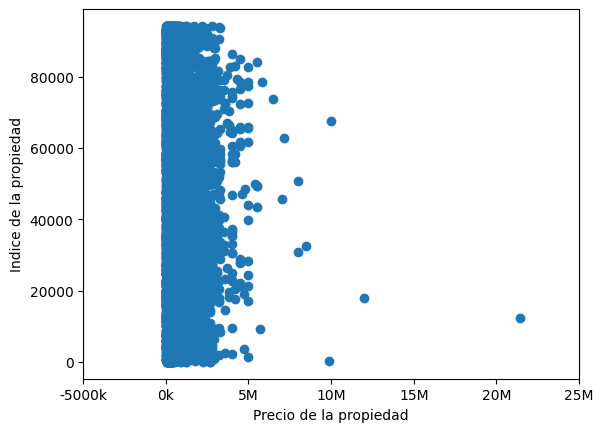

In [308]:
#Grafico de distribucion de property_price
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.scatter(properati_filtrado['property_price'], range(len(properati_filtrado['property_price'])))
plt.xlabel('Precio de la propiedad')
plt.ylabel('Indice de la propiedad')
etiquetas, etiquetas_nuevas = convertir_precio(plt.xticks()[0])
plt.xticks(ticks=etiquetas, labels=etiquetas_nuevas)
plt.show()

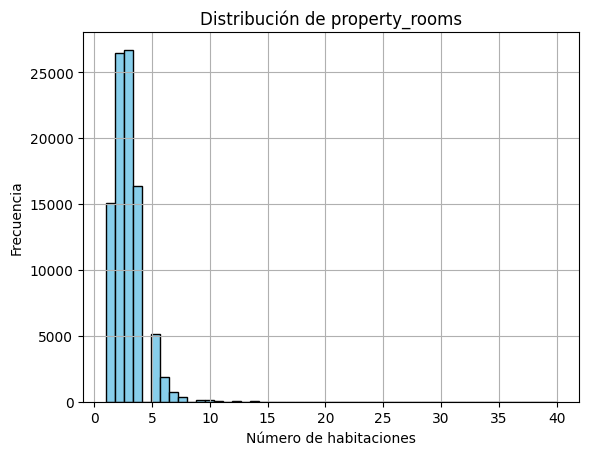

In [309]:
#Grafico de distribucion de property_rooms
plt.hist(properati_filtrado['property_rooms'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Número de habitaciones')
plt.ylabel('Frecuencia')
plt.title('Distribución de property_rooms')
plt.grid(True)
plt.show()

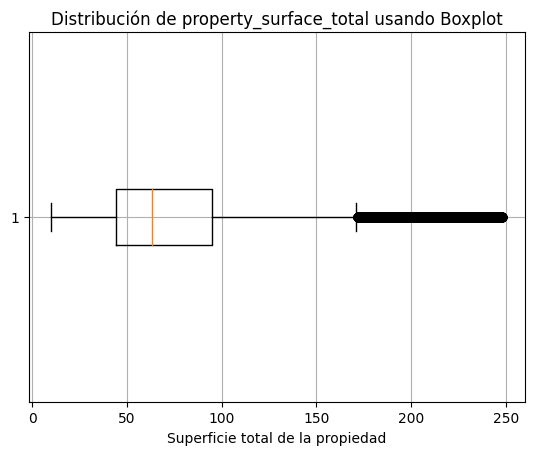

In [310]:
#Grafico de distribucion de property_surface_total
property_surface_total_sin_outliers = properati_filtrado[properati_filtrado['property_surface_total'] < properati_filtrado['property_surface_total'].quantile(0.95)]
plt.boxplot(property_surface_total_sin_outliers['property_surface_total'], vert=False)
plt.xlabel('Superficie total de la propiedad')
plt.title('Distribución de property_surface_total usando Boxplot')
plt.grid(True)
plt.show()

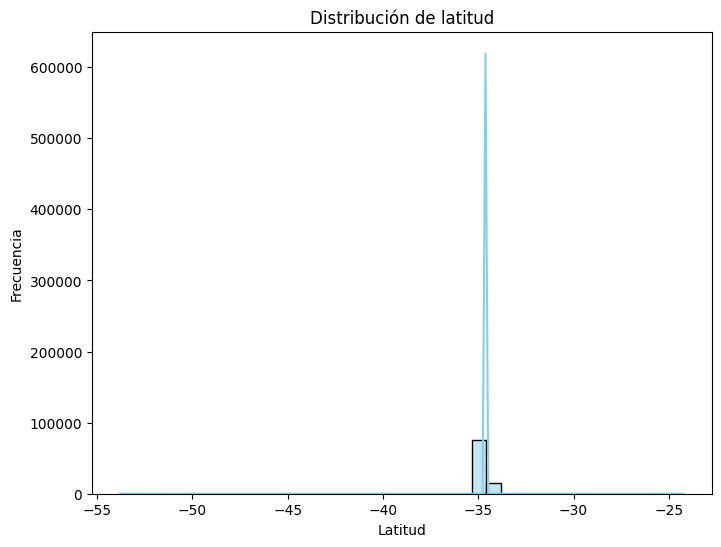

In [311]:
#Grafico de distribucion de latitud
plt.figure(figsize=(8, 6))
sns.histplot(properati_filtrado['latitud'], bins = 40, kde=True, color='skyblue')
plt.title('Distribución de latitud')
plt.xlabel('Latitud')
plt.ylabel('Frecuencia')
plt.show()


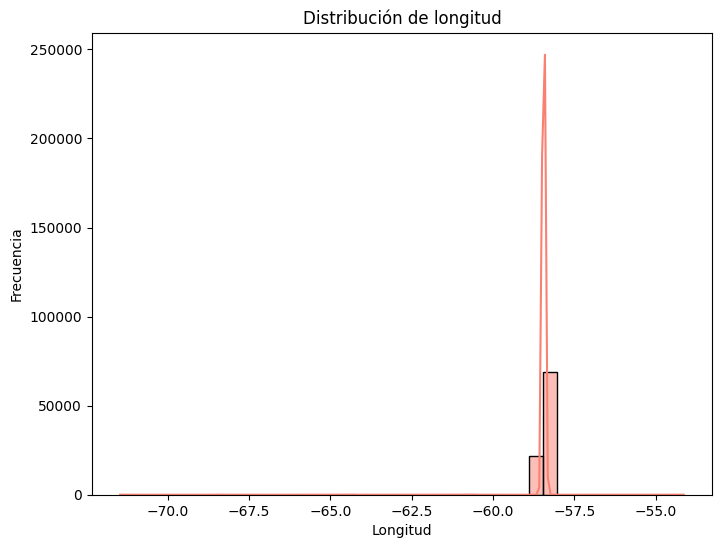

In [312]:
#Grafico de distribucion de longitud
plt.figure(figsize=(8, 6))
sns.histplot(properati_filtrado['longitud'], bins = 40, kde=True, color='salmon')
plt.title('Distribución de longitud')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.show()

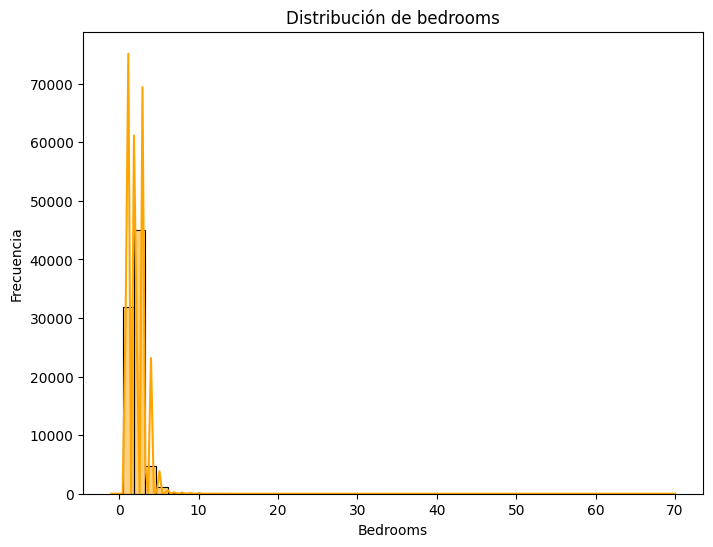

In [313]:
#Grafico de distribucion de property_bedrooms
plt.figure(figsize=(8, 6))
sns.histplot(properati_filtrado['property_bedrooms'], bins = 50, kde=True, color='orange')
plt.title('Distribución de bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frecuencia')
plt.show()

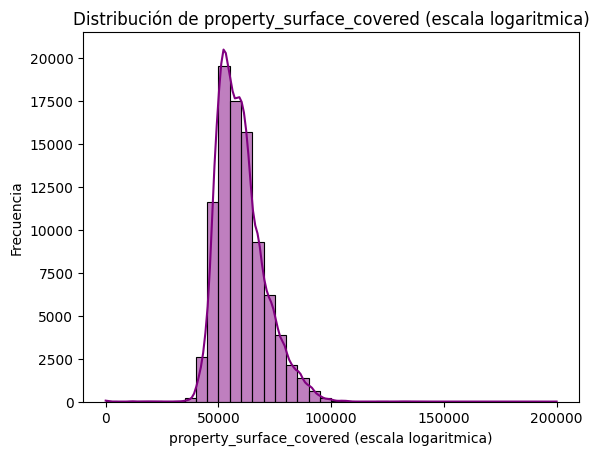

In [314]:
#Grafico de distribucion de property_surface_covered
log_property_surface_covered = np.log1p(properati_filtrado['property_surface_covered'])
# Hacemos la estrategia de aplicar logaritmo para poder observar mejor los valores
sns.histplot(log_property_surface_covered, bins=40, kde=True, color='purple')
plt.title('Distribución de property_surface_covered (escala logaritmica)')
plt.xlabel('property_surface_covered (escala logaritmica)')
plt.ylabel('Frecuencia')
ticks = np.linspace(log_property_surface_covered.min(), log_property_surface_covered.max(), num=5)
labels = ['0', '50000', '100000', '150000', '200000']
plt.xticks(ticks, labels)
plt.show()

##### **Correlaciones**

In [315]:
#Algunas correlaciones que pueden servir

#'property_price' y 'property_surface_total'
corr_precio_superficie = properati_filtrado['property_price'].corr(properati_filtrado['property_surface_total'])

print("Correlación entre 'property_price' y 'property_surface_total':", corr_precio_superficie)

#'property_price' y 'property_rooms'
corr_precio_habs = properati_filtrado['property_price'].corr(properati_filtrado['property_rooms'])

print("Correlación entre 'property_price' y 'property_rooms':", corr_precio_habs)

#'property_price' y 'property_surface_covered'
corr_precio_superficie_cubierta = properati_filtrado['property_price'].corr(properati_filtrado['property_surface_covered'])

print("Correlación entre 'property_price' y 'property_surface_covered':", corr_precio_superficie_cubierta)


Correlación entre 'property_price' y 'property_surface_total': 0.08523491719899819
Correlación entre 'property_price' y 'property_rooms': 0.488934080178357
Correlación entre 'property_price' y 'property_surface_covered': 0.05623785863824733


#### b) **Visualización de los datos**
En esta sección se espera que puedan realizar una primera aproximación a los datos apoyándose en visualizaciones, por ejemplo: gráficos de dispersiónentre variables, histogramas, heatmaps, exploración de las columnas y cualquier otro gráfico adicional que se considere útil justificando su utilización.

###### **Grafico de dispersion entre 'property_price' y property_surface_total'**

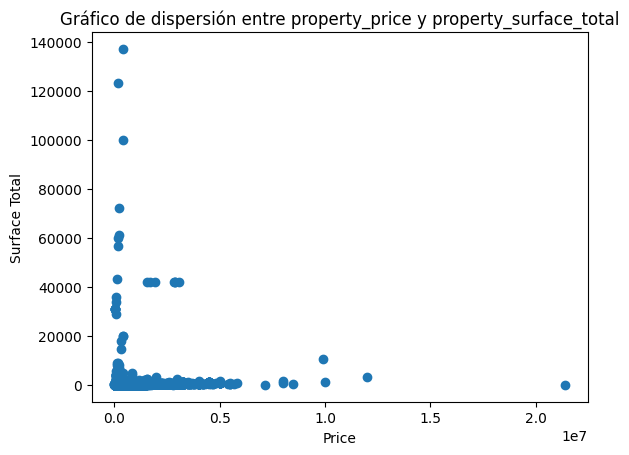

In [316]:
#grafico de dispersion entre 'property_price' y property_surface_total'
plt.scatter(properati_filtrado['property_price'], properati_filtrado['property_surface_total'])
plt.xlabel('Price')
plt.ylabel('Surface Total')
plt.title('Gráfico de dispersión entre property_price y property_surface_total')
plt.show()

###### **Grafico entre 'property_price' y property_rooms'**

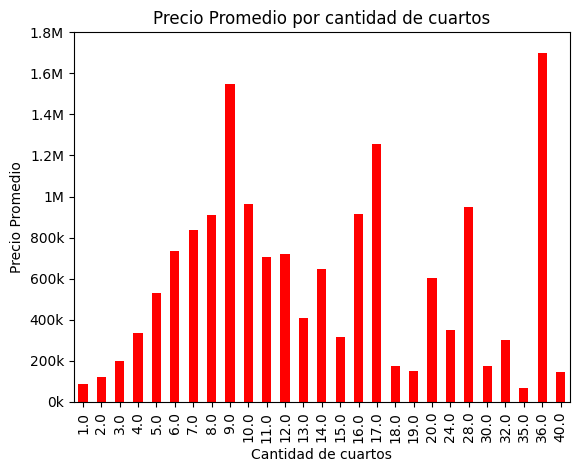

In [317]:
#grafico entre 'property_price' y property_rooms'
precio_promedio_por_cuartos = properati_filtrado.groupby('property_rooms')['property_price'].mean()
precio_promedio_por_cuartos
precio_promedio_por_cuartos.plot(kind='bar', color='red')
plt.xlabel('Cantidad de cuartos')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por cantidad de cuartos')
etiquetas_y, etiquetas_nuevas = convertir_precio(plt.yticks()[0])
plt.yticks(ticks=etiquetas_y, labels=etiquetas_nuevas)
plt.show()

###### **Grafico de precio por tipo de propiedad**

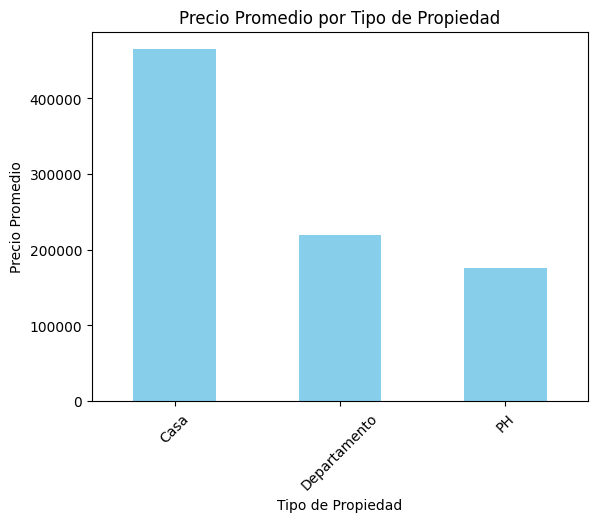

In [318]:
#precio por tipo de propiedad
precio_promedio_por_tipo = properati_filtrado.groupby('property_type')['property_price'].mean()

precio_promedio_por_tipo.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Tipo de Propiedad')
plt.xticks(rotation=45)
plt.show()

###### **Grafico de Precio Promedio de Propiedades por Barrio**

<ipython-input-319-91bae148375a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='barrio', y='property_price', data=properati_filtrado, estimator='mean', ci=None)


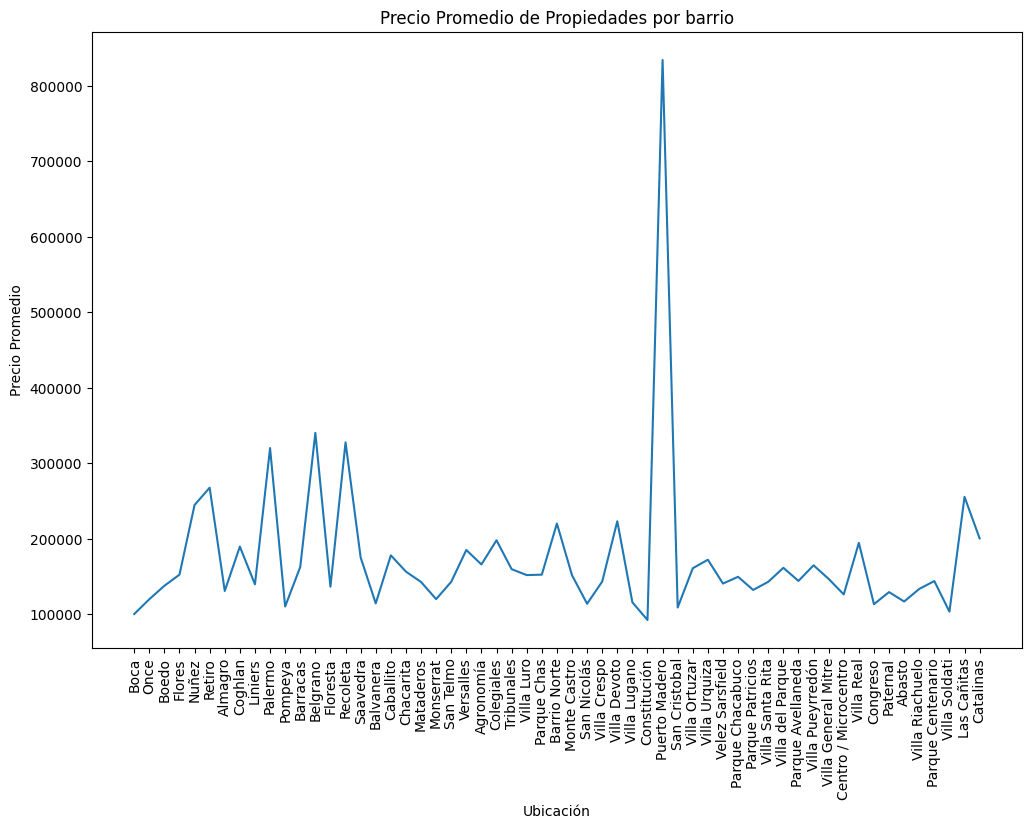

In [319]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='barrio', y='property_price', data=properati_filtrado, estimator='mean', ci=None)
plt.xticks(rotation=90)
plt.xlabel('Ubicación')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio de Propiedades por barrio')
plt.show()

###### **Grafico de Precio dependiendo de cantidad de superficie cubierta**

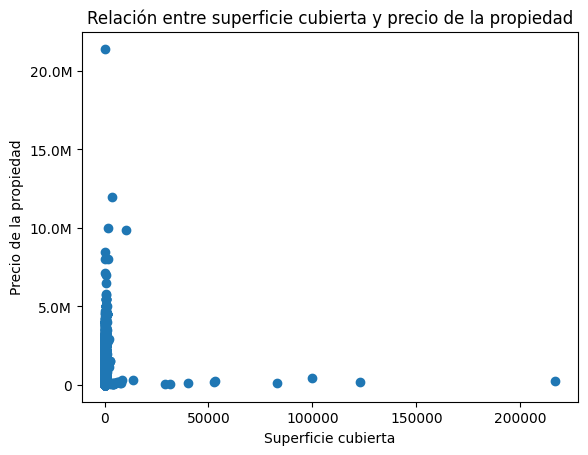

In [349]:
plt.scatter(x=properati_filtrado['property_surface_covered'], y=properati_filtrado['property_price'])
plt.gca().yaxis.set_major_formatter(format_price)
plt.title('Relación entre superficie cubierta y precio de la propiedad')
plt.xlabel('Superficie cubierta')
plt.ylabel('Precio de la propiedad')
plt.show()

#### c) **Datos Faltantes** : analizar la presencia de datos faltantes en el dataset

● Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable el porcentaje de datos faltantes con respecto al total del dataset.

● Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de faltantes por fila en el dataset.

● Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de valores, eliminación de registros incompletos, etc.

● En caso de realizar imputaciones comparar las distribuciones de cada atributo reparado con la distribución anterior a la imputación de los datos faltantes.

##### **Datos faltantes a nivel columna**



<ipython-input-321-a6efc85f14a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_faltantes_col.values, y=porcentaje_faltantes_col.index, palette='pastel')


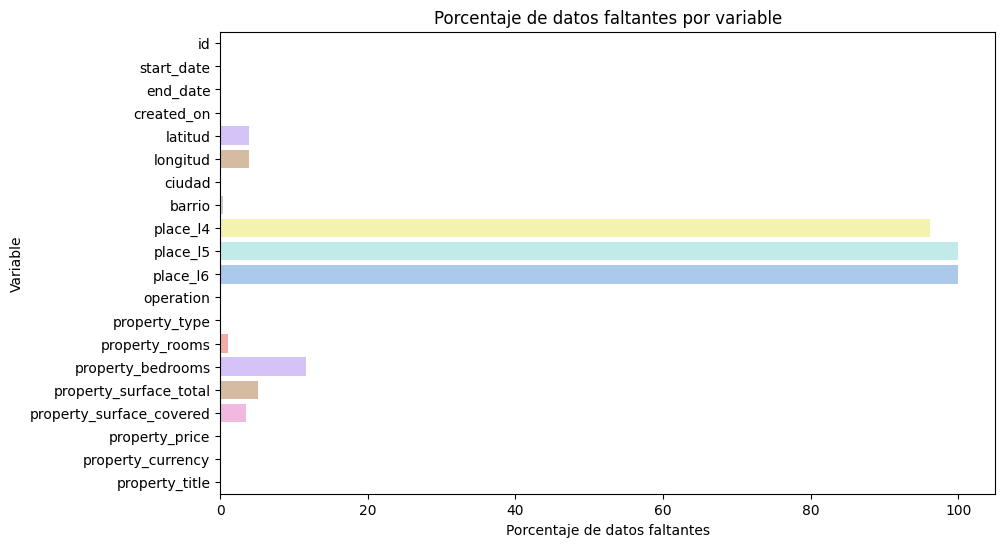

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.957602
longitud                      3.957602
ciudad                        0.000000
barrio                        0.442445
place_l4                     96.134707
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.107704
property_bedrooms            11.657418
property_surface_total        5.139577
property_surface_covered      3.558658
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


In [321]:
#Datos faltantes a nivel columna
porcentaje_faltantes_col = (properati_filtrado.isnull().sum() / len(properati_filtrado)) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=porcentaje_faltantes_col.values, y=porcentaje_faltantes_col.index, palette='pastel')
plt.xlabel('Porcentaje de datos faltantes')
plt.ylabel('Variable')
plt.title('Porcentaje de datos faltantes por variable')
plt.show()
print(porcentaje_faltantes_col)

##### **Datos faltantes a nivel fila**

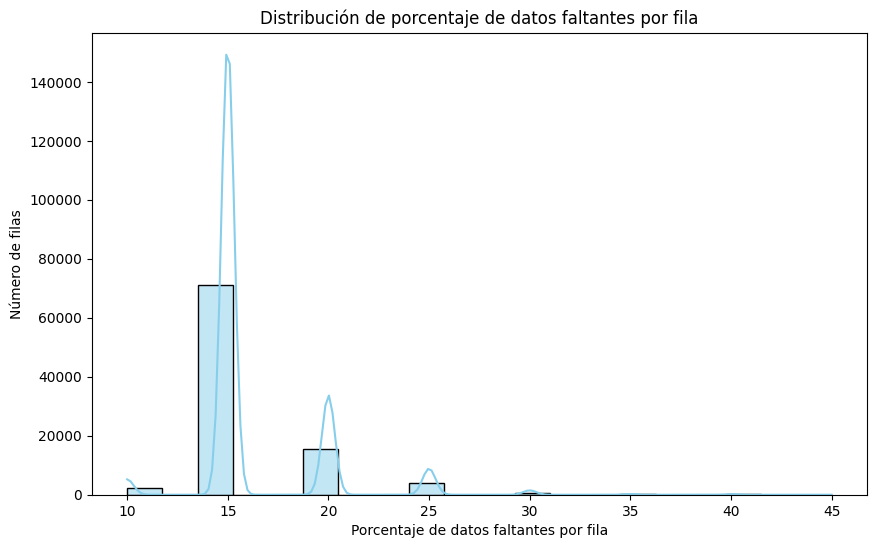

25        30.0
42        15.0
43        15.0
49        20.0
51        20.0
          ... 
460072    15.0
460073    15.0
460074    15.0
460075    15.0
460090    15.0
Length: 94249, dtype: float64


In [322]:
#Datos faltantes a nivel fila
porcentaje_faltantes_fil = (properati_filtrado.isnull().sum(axis=1) / len(properati_filtrado.columns)) * 100

plt.figure(figsize=(10, 6))
sns.histplot(porcentaje_faltantes_fil, bins=20, kde=True, color='skyblue')
plt.xlabel('Porcentaje de datos faltantes por fila')
plt.ylabel('Número de filas')
plt.title('Distribución de porcentaje de datos faltantes por fila')
plt.show()
print(porcentaje_faltantes_fil)

##### **Decision sobre datos faltantes**

###### *Columnas*

- *'place_l4', 'place_l5' y 'place_l6'*: Al observar el gráfico, notamos que tienen un porcentaje alto de datos faltantes, por lo tanto no podemos reemplazarlos ya que tendriamos que inventar muchos valores. Por lo tanto, lo mas adecuado seria eliminar esas columnas ya que no aportan mucha informacion adicional.
- *'latitud' y 'longitud'*: se puede ver en que barrio estan esas propiedades y poner unas coordenadas aproximadas.
- *'place_l3' aka 'Barrio'*: se puede ver la latitud y longitud que tienen y deducir el barrio.
- *'rooms'*: promedio?
- *'bedrooms'*: rooms -1 (todos los cuartos menos el living)
- *'surface_total'*: promedio?
- *'surface_covered'*: promedio?

In [323]:
properati_full = properati_filtrado
properati_full.columns.to_list()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'ciudad',
 'barrio',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

In [324]:
#Elimino las columnas: 'ciudad', 'operation' y 'property_currency' ya que tienen en cada una todas las propiedades la misma informacion
#debido a la filtracion inicial y; 'place_l4', 'place_l5' y 'place_l6' debido a la cantidad de datos faltantes que tienen.
properati_full = properati_filtrado.drop(columns=['ciudad', 'operation', 'property_currency', 'place_l4', 'place_l5', 'place_l6'])
properati_full.columns.to_list()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'barrio',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_title']

In [325]:
properati_full.isnull().sum()

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                      3730
longitud                     3730
barrio                        417
property_type                   0
property_rooms               1044
property_bedrooms           10987
property_surface_total       4844
property_surface_covered     3354
property_price                  0
property_title                  0
dtype: int64

Completo los datos faltantes de 'latitud' y 'longitud' buscando otras propiedades en el df con el mismo barrio y asi obtener unas latitud y longitud aproximadas.

In [326]:
for index, row in properati_full.iterrows():
    # Verificar si la propiedad actual tiene datos faltantes de latitud y longitud
    if pd.isna(row['latitud']) or pd.isna(row['longitud']):
        # Buscar otras propiedades en el mismo barrio que tengan coordenadas conocidas
        propiedades_similares = properati_full[(properati_full['barrio'] == row['barrio']) &
                                                ~pd.isna(properati_full['latitud']) &
                                                ~pd.isna(properati_full['longitud'])]
        if not propiedades_similares.empty:
            # Tomar las coordenadas de la primera propiedad similar encontrada
            latitud_similar = propiedades_similares.iloc[0]['latitud']
            longitud_similar = propiedades_similares.iloc[0]['longitud']

            # Asignar las coordenadas a la propiedad actual
            properati_full.at[index, 'latitud'] = latitud_similar
            properati_full.at[index, 'longitud'] = longitud_similar

properati_full.isnull().sum()

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                       170
longitud                      170
barrio                        417
property_type                   0
property_rooms               1044
property_bedrooms           10987
property_surface_total       4844
property_surface_covered     3354
property_price                  0
property_title                  0
dtype: int64

Veo que hay propiedades que no tienen ni barrio ni latitud y longitud. 170 para ser exactos.

Completo los datos faltantes en los barrios buscando otras propiedades cercanas que tengan el barrio conocido y también tengan coordenadas de latitud y longitud

In [327]:
for index, row in properati_full.iterrows():
    # Verificar si el barrio actual tiene datos faltantes
    if pd.isna(row['barrio']):
        # Buscar otras propiedades cercanas que tengan el barrio conocido
        propiedades_cercanas = properati_full[~pd.isna(properati_full['barrio']) &
                                               ~pd.isna(properati_full['latitud']) &
                                               ~pd.isna(properati_full['longitud'])]
        if not propiedades_cercanas.empty:
            # Tomar el barrio de la primera propiedad cercana encontrada
            barrio_cercano = propiedades_cercanas.iloc[0]['barrio']

            # Asignar el barrio a la propiedad actual
            properati_full.at[index, 'barrio'] = barrio_cercano

properati_full.isnull().sum()

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                       170
longitud                      170
barrio                          0
property_type                   0
property_rooms               1044
property_bedrooms           10987
property_surface_total       4844
property_surface_covered     3354
property_price                  0
property_title                  0
dtype: int64

Como ahora todas las propiedades tienen un barrio, se puede repetir el procedimiento y asi completar las filas que les falta 'latitud' y 'longitud'

In [328]:
for index, row in properati_full.iterrows():
    # Verificar si la propiedad actual tiene datos faltantes de latitud y longitud
    if pd.isna(row['latitud']) or pd.isna(row['longitud']):
        # Buscar otras propiedades en el mismo barrio que tengan coordenadas conocidas
        propiedades_similares = properati_full[(properati_full['barrio'] == row['barrio']) &
                                                ~pd.isna(properati_full['latitud']) &
                                                ~pd.isna(properati_full['longitud'])]
        if not propiedades_similares.empty:
            # Tomar las coordenadas de la primera propiedad similar encontrada
            latitud_similar = propiedades_similares.iloc[0]['latitud']
            longitud_similar = propiedades_similares.iloc[0]['longitud']

            # Asignar las coordenadas a la propiedad actual
            properati_full.at[index, 'latitud'] = latitud_similar
            properati_full.at[index, 'longitud'] = longitud_similar

properati_full.isnull().sum()

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                         0
longitud                        0
barrio                          0
property_type                   0
property_rooms               1044
property_bedrooms           10987
property_surface_total       4844
property_surface_covered     3354
property_price                  0
property_title                  0
dtype: int64

Completo los valores faltantes en el atributo 'rooms' poniendoles a los casilleros vacios el promedio de cantidad de cuartos de las demas propiedades:

In [329]:
properati_full['property_rooms'] = properati_full['property_rooms'].fillna(mediana_rooms)
properati_full.isnull().sum()

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                         0
longitud                        0
barrio                          0
property_type                   0
property_rooms                  0
property_bedrooms           10987
property_surface_total       4844
property_surface_covered     3354
property_price                  0
property_title                  0
dtype: int64

Completo los valores faltantes del atributo 'property_bedrooms' con la cantidad de cuartos que tiene esa propiedad - 1. Ya que, en general, en una propiedad se cuentan como ambientes todas las habitaciones mas el living.

In [330]:
for index, row in properati_full.iterrows():
    # Si la cantidad de cuartos no es nula, calcular la cantidad de habitaciones
    if pd.notnull(row['property_rooms']):
        properati_full.at[index, 'property_bedrooms'] = row['property_rooms'] - 1

properati_full.isnull().sum()

id                             0
start_date                     0
end_date                       0
created_on                     0
latitud                        0
longitud                       0
barrio                         0
property_type                  0
property_rooms                 0
property_bedrooms              0
property_surface_total      4844
property_surface_covered    3354
property_price                 0
property_title                 0
dtype: int64

Completamos los valores faltantes de los atributos 'surface_total' y 'surface_covered' usando la tecnica de Imputacion por vecinos mas cercanos(KNN)

In [331]:
from sklearn.impute import KNNImputer
features = ['property_price', 'property_rooms']

# Inicializar el imputador KNN
imputer = KNNImputer(n_neighbors=2)

# Imputar valores faltantes para 'surface_total' y 'surface_covered'
properati_full[['property_surface_total', 'property_surface_covered']] = imputer.fit_transform(properati_full[features])

properati_full.isnull().sum()

id                          0
start_date                  0
end_date                    0
created_on                  0
latitud                     0
longitud                    0
barrio                      0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
property_title              0
dtype: int64

###### *Filas*

Una vez completados todos los datos faltantes a nivel columna, tambien se completaron los datos faltantes a nivel fila.

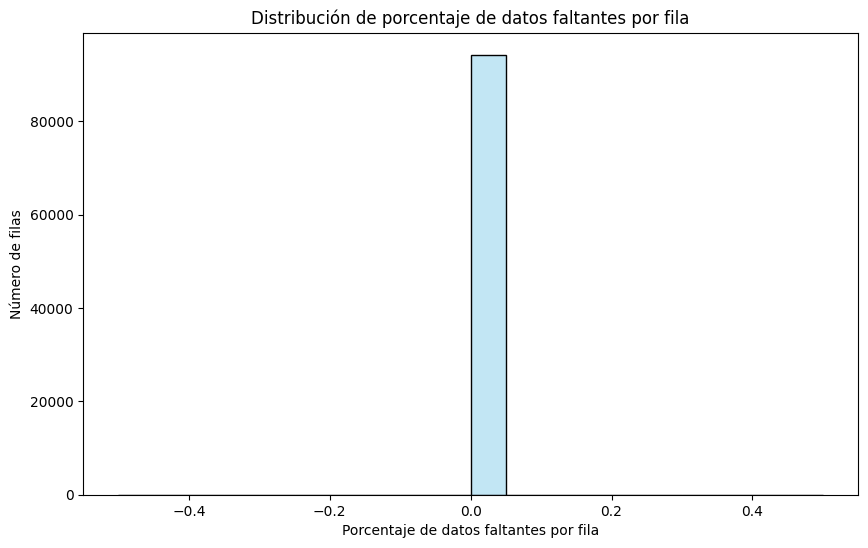

25        0.0
42        0.0
43        0.0
49        0.0
51        0.0
         ... 
460072    0.0
460073    0.0
460074    0.0
460075    0.0
460090    0.0
Length: 94249, dtype: float64


In [332]:
#Datos faltantes a nivel fila
porcentaje_faltantes_fil = (properati_full.isnull().sum(axis=1) / len(properati_full.columns)) * 100

plt.figure(figsize=(10, 6))
sns.histplot(porcentaje_faltantes_fil, bins=20, kde=True, color='skyblue')
plt.xlabel('Porcentaje de datos faltantes por fila')
plt.ylabel('Número de filas')
plt.title('Distribución de porcentaje de datos faltantes por fila')
plt.show()
print(porcentaje_faltantes_fil)

Confirmamos que no quedo ninguna fila con algun dato faltante.

##### *Distribuciones de las variables luego de trabajar con los datos faltantes*

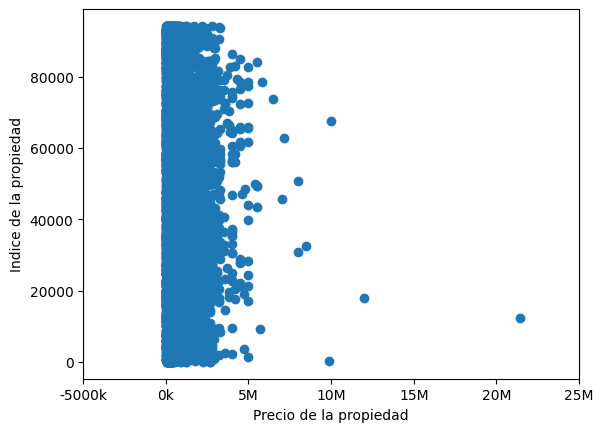

In [333]:
#Grafico de distribucion de property_price
plt.scatter(properati_full['property_price'], range(len(properati_full['property_price'])))
plt.xlabel('Precio de la propiedad')
plt.ylabel('Indice de la propiedad')
etiquetas, etiquetas_nuevas = convertir_precio(plt.xticks()[0])
plt.xticks(ticks=etiquetas, labels=etiquetas_nuevas)
plt.show()

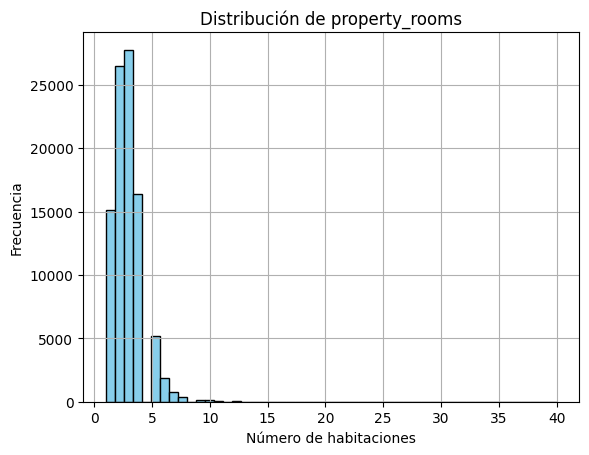

In [334]:
#Grafico de distribucion de property_rooms
plt.hist(properati_full['property_rooms'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Número de habitaciones')
plt.ylabel('Frecuencia')
plt.title('Distribución de property_rooms')
plt.grid(True)
plt.show()

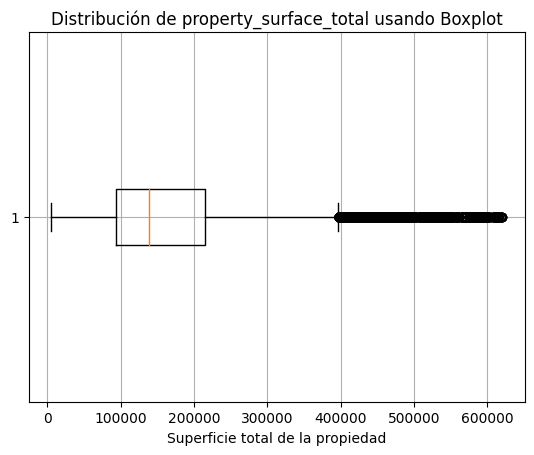

In [335]:
#Grafico de distribucion de property_surface_total
property_surface_total_sin_outliers = properati_full[properati_full['property_surface_total'] < properati_full['property_surface_total'].quantile(0.95)]
plt.boxplot(property_surface_total_sin_outliers['property_surface_total'], vert=False)
plt.xlabel('Superficie total de la propiedad')
plt.title('Distribución de property_surface_total usando Boxplot')
plt.grid(True)
plt.show()

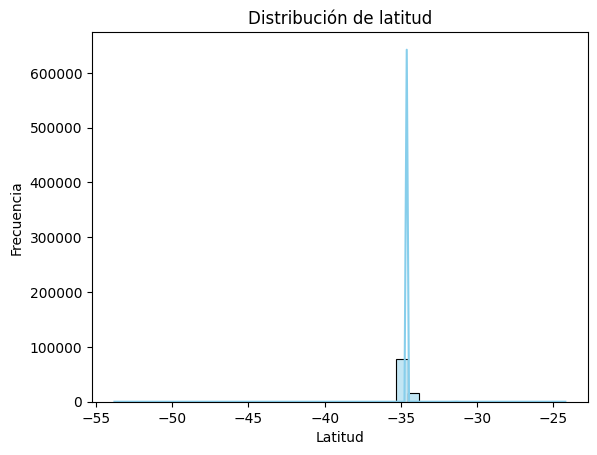

In [336]:
#Grafico de distribucion de latitud
sns.histplot(properati_full['latitud'], bins = 40, kde=True, color='skyblue')
plt.title('Distribución de latitud')
plt.xlabel('Latitud')
plt.ylabel('Frecuencia')
plt.show()


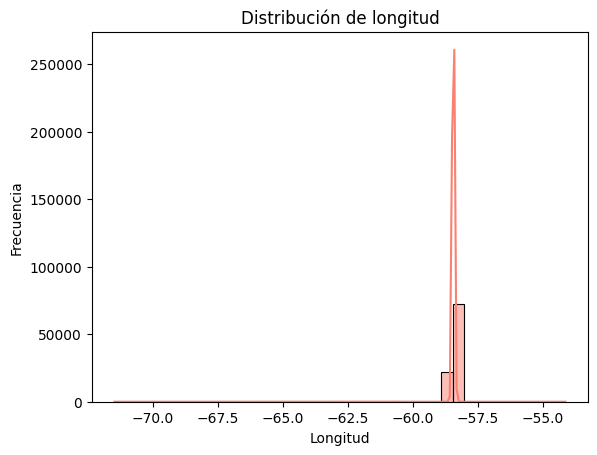

In [337]:
#Grafico de distribucion de longitud
sns.histplot(properati_full['longitud'], bins = 40, kde=True, color='salmon')
plt.title('Distribución de longitud')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.show()

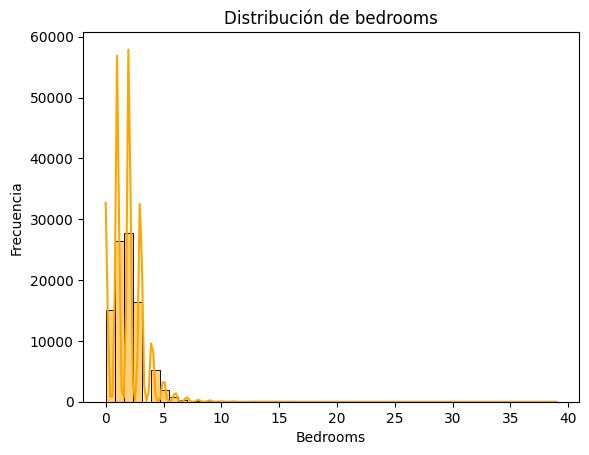

In [338]:
#Grafico de distribucion de property_bedrooms
sns.histplot(properati_full['property_bedrooms'], bins = 50, kde=True, color='orange')
plt.title('Distribución de bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frecuencia')
plt.show()

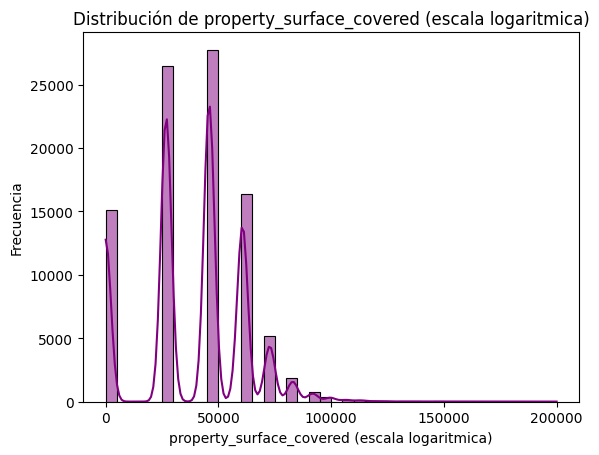

In [339]:
#Grafico de distribucion de property_surface_covered
log_property_surface_covered = np.log1p(properati_full['property_surface_covered'])
# Hacemos la misma estrategia de aplicar logaritmo para poder observar mejor los valores
sns.histplot(log_property_surface_covered, bins=40, kde=True, color='purple')
plt.title('Distribución de property_surface_covered (escala logaritmica)')
plt.xlabel('property_surface_covered (escala logaritmica)')
plt.ylabel('Frecuencia')
ticks = np.linspace(log_property_surface_covered.min(), log_property_surface_covered.max(), num=5)
labels = ['0', '50000', '100000', '150000', '200000']
plt.xticks(ticks, labels)
plt.show()

#### d) Valores atípicos : analizar la existencia de valores atípicos
- Detectar valores atípicos en los datos tanto en forma univariada como multivariada.
Realizar gráficos que permitan visualizar los valores atípicos.
- Explicar qué características poseen los datos atípicos detectados.
- Decidir el tratamiento a aplicar sobre los mismos.
- Analizar la relación entre el precio de venta y los metros de superficie ¿hay valores atípicos
que no se detectaron previamente?

##### **Valores atípicos en distribuciones univariadas**

###### *Valores atipicos de property_surface_total*

<ipython-input-340-238697b558e3>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=log_property_surface_total, scale='width')


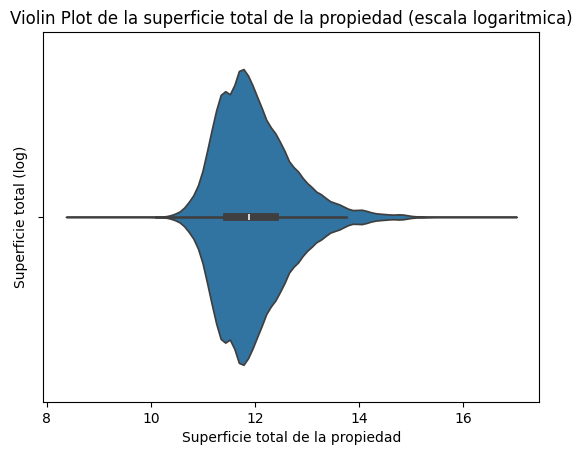

In [340]:
from matplotlib.ticker import ScalarFormatter
# Aplico logaritmo a la variable ya que, al haber valores tan grandes, no se llega a distinguir del todo bien el grafico.
log_property_surface_total = np.log1p(properati_full['property_surface_total'])
sns.violinplot(x=log_property_surface_total, scale='width')
plt.title('Violin Plot de la superficie total de la propiedad (escala logaritmica)')
plt.xlabel('Superficie total de la propiedad')
plt.ylabel('Superficie total (log)')
plt.show()

###### *Valores atipicos de property_rooms*

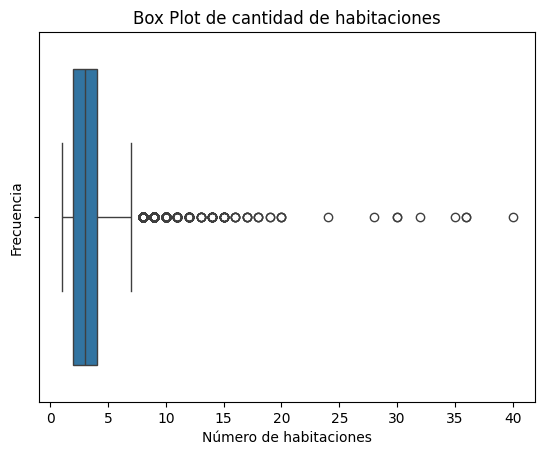

In [341]:
sns.boxplot(x=properati_full['property_rooms'])
plt.title('Box Plot de cantidad de habitaciones')
plt.xlabel('Número de habitaciones')
plt.ylabel('Frecuencia')
plt.show()

##### **Valores atípicos en distribuciones multivariadas**


###### *Valores atipicos en property_bedrooms por tipo de propiedad*

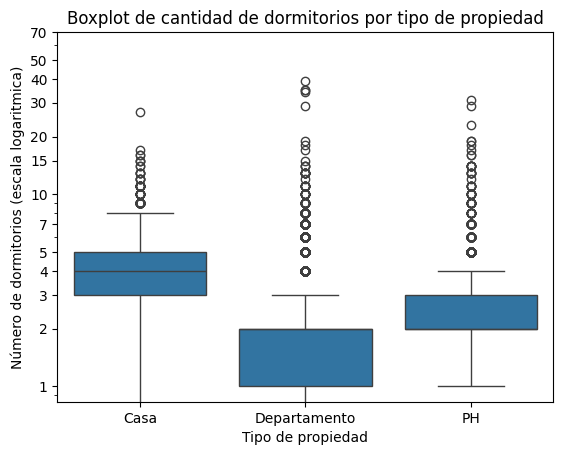

In [342]:
sns.boxplot(x='property_type', y='property_bedrooms', data=properati_full)
plt.yscale('log')
plt.title('Boxplot de cantidad de dormitorios por tipo de propiedad')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Número de dormitorios (escala logaritmica)')
# Cambio la escala a logaritmica ya que, al haber valores tan grandes, no se llega a distinguir del todo bien el grafico.
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.yticks(ticks=[1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 40, 50, 70])
plt.show()

###### *Valores atipicos en property_surface_total y property_price*

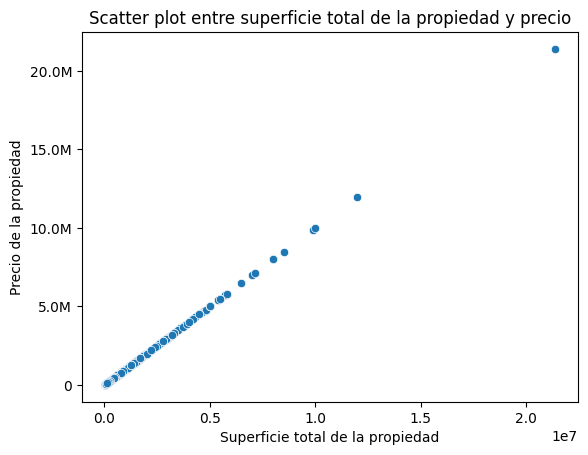

In [343]:
import matplotlib.ticker as ticker
sns.scatterplot(x='property_surface_total', y='property_price', data=properati_full)
plt.title('Scatter plot entre superficie total de la propiedad y precio')
#cambio el formato para que se vea como millones o miles en lugar de notacion cientifica
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_price))
plt.xlabel('Superficie total de la propiedad')
plt.ylabel('Precio de la propiedad')
plt.show()

###### *Valores atipicos en barrio y property_price*

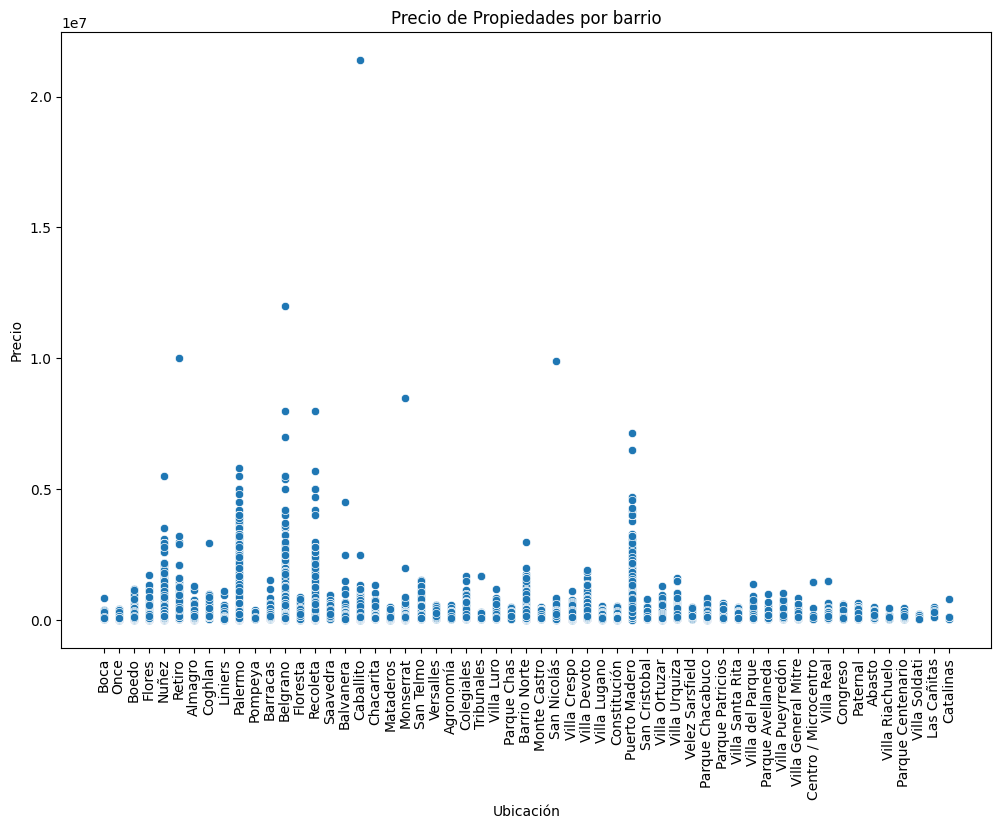

In [344]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='barrio', y='property_price', data=properati_filtrado)
plt.xticks(rotation=90)
plt.xlabel('Ubicación')
plt.ylabel('Precio')
plt.title('Precio de Propiedades por barrio')
plt.show()

##### **Caracteristicas de los datos atipicos**
Observamos que, en cuanto a variables multivariadas, los datos atipicos en cuanto a la superficie de la propiedad y el precio podria ser causado por una falla en el tipeo a la hora de cargarlos en el dataset. Asumimos esto y con esta información simplemente eliminamos un cero en los valores que superan 1.5M de superficie total de la propiedad. En la cantidad de habitaciones, hay algunos valores que nos parecen demasiado altos y podriamos considerarlos outliers, pero tenemos que tener en consideración que tipo de propiedad es, ya que una casa con 20 habitaciones nos hace pensar que hay un problema con este dato, pero si es un PH, quizá no es algo que suene muy por fuera de lo normal. De esta forma, si tenemos propiedades que son casas o departamentos con una cantidad de habitaciones mayor a 20, serán eliminados esos datos porque consideramos que no representan nuestro modelo correctamente y no nos ayudan para modelar lo que queremos.

In [345]:
# Eliminar un cero en los valores de superficie total de la propiedad que superen 1.5M
properati_final = properati_full
properati_final['property_surface_total'] = properati_final['property_surface_total'].apply(lambda x: x / 10 if x > 1500000 else x)

# Eliminar datos de casas o departamentos con más de 20 habitaciones
properati_final = properati_final[(properati_final['property_type'] != 'Casa') | (properati_final['property_rooms'] <= 20)]
properati_final = properati_final[(properati_final['property_type'] != 'Departamento') | (properati_final['property_rooms'] <= 20)]

##### **Distribucion de las variables luego de tratar los valores atipicos**

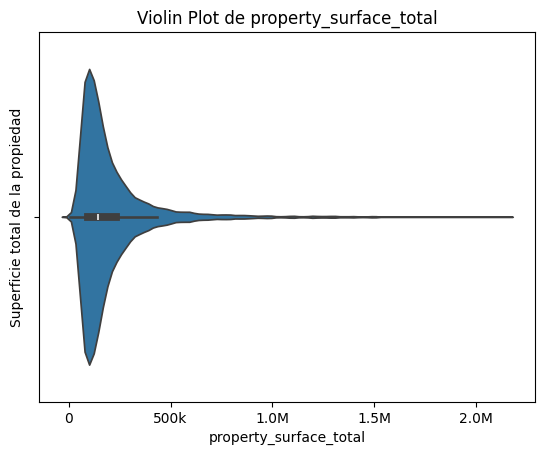

In [346]:
sns.violinplot(x=properati_final['property_surface_total'])
# vemos que ya no hace falta usar una escala logaritmica ya que la distancia entre el rango intercuartil y los valores atipicos se redujo
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_price))
plt.title('Violin Plot de property_surface_total')
plt.ylabel('Superficie total de la propiedad')
plt.show()

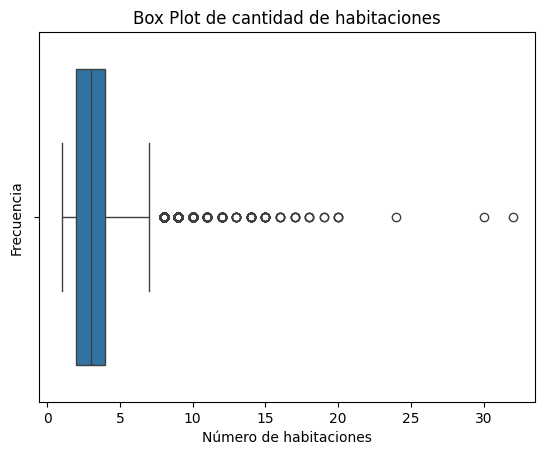

In [347]:
sns.boxplot(x=properati_final['property_rooms'])
plt.title('Box Plot de cantidad de habitaciones')
plt.xlabel('Número de habitaciones')
plt.ylabel('Frecuencia')
plt.show()

##### ***Relación entre el precio de venta y los metros de superficie***

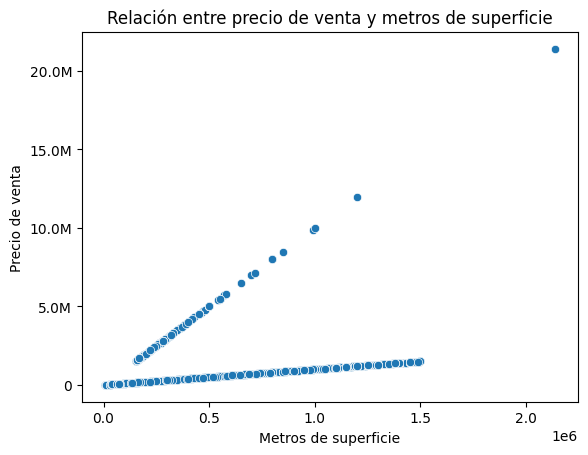

In [348]:
ax = sns.scatterplot(x='property_surface_total', y='property_price', data=properati_final)
plt.title('Relación entre precio de venta y metros de superficie')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_price))
plt.xlabel('Metros de superficie')
plt.ylabel('Precio de venta')
plt.show()

**¿Hay valores atípicos que no se detectaron previamente?** Se puede observar que si, hay valores atípicos que no fueron detectados y, por lo tanto, tratados de forma adecuada.